**Name: Aishwarya Bhavsar**<br>
<b>CSULB ID : 029371509<br>
Machine Vision - Assignment 4

In [9]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [6]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
 plt.figure(figsize=(10,10))
 plt.subplot(1, 2, 1)
 plt.imshow(image_1,cmap="gray")
 plt.title(title_1)
 plt.subplot(1, 2, 2)
 plt.imshow(image_2,cmap="gray")
 plt.title(title_2)
 plt.show()

In [54]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"): 
 intensity_values=np.array([x for x in range(256)])
 plt.subplot(1, 2, 1)
 hist =  cv2.calcHist([old_image],[0],None,[256],[0,256])
 plt.bar(intensity_values,hist[:,0],width = 5)
 plt.title(title_old)
 plt.xlabel('intensity')
 plt.subplot(1, 2, 2)
 hist = cv2.calcHist([new_image],[0],None,[256],[0,256])
 plt.bar(intensity_values, hist[:,0],width = 5)
 plt.title(title_new)
 plt.xlabel('intensity')
 plt.show()

**HISTOGRAMS**

**Toy Example**

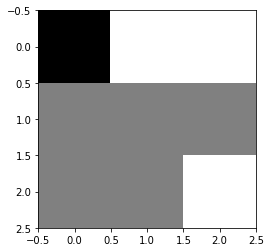

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [18]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy_image:",toy_image)

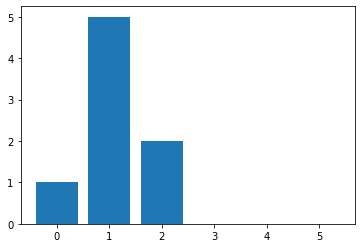

In [19]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

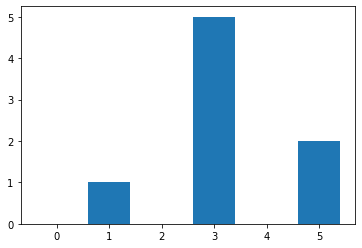

In [20]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()

**Gray Scale Histograms**

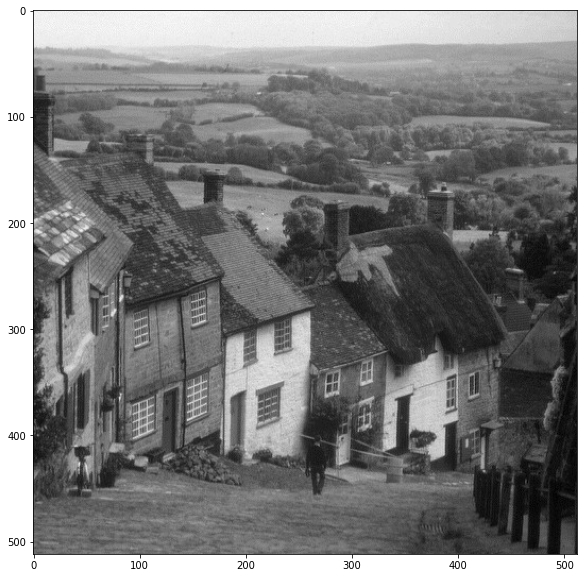

In [21]:
goldhill = cv2.imread("GoldHill.jpeg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill,cmap="gray")
plt.show()

In [22]:
hist = cv2.calcHist([goldhill],[0], None, [256], [0,256])

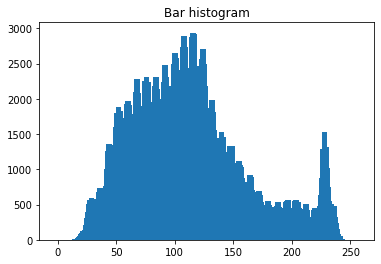

In [29]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

In [30]:
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])

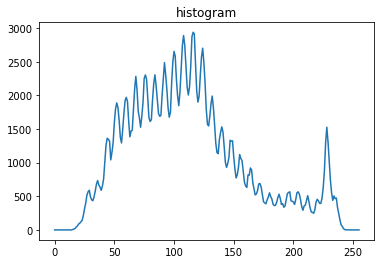

In [31]:
plt.plot(intensity_values,hist)
plt.title("histogram")
plt.show()

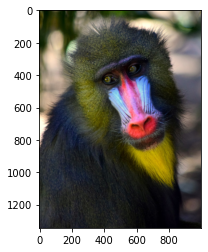

In [32]:
baboon = cv2.imread("baboon.jpg")
plt.imshow(cv2.cvtColor(baboon,cv2.COLOR_BGR2RGB))
plt.show()

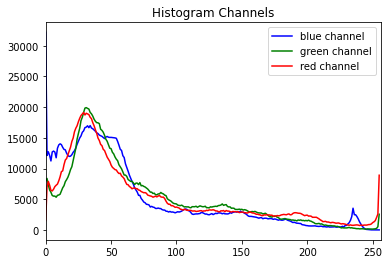

In [33]:
color = ('blue','green','red')
for i,col in enumerate(color):
 histr = cv2.calcHist([baboon],[i],None,[256],[0,256])
 plt.plot(intensity_values,histr,color = col,label=col+" channel")

 plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

**Intensity Transformations**

**Image Negatives**

In [34]:
neg_toy_image = -1 * toy_image + 255
print("toy image\n", neg_toy_image)
print("image negatives\n", neg_toy_image)

toy image
 [[255 253 253]
 [254 254 254]
 [254 254 253]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


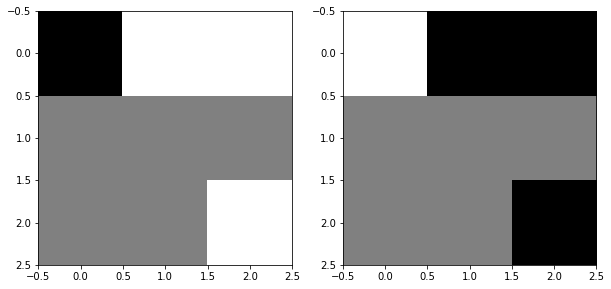

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [35]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(neg_toy_image,cmap="gray")
plt.show()
print("toy_image:",toy_image)

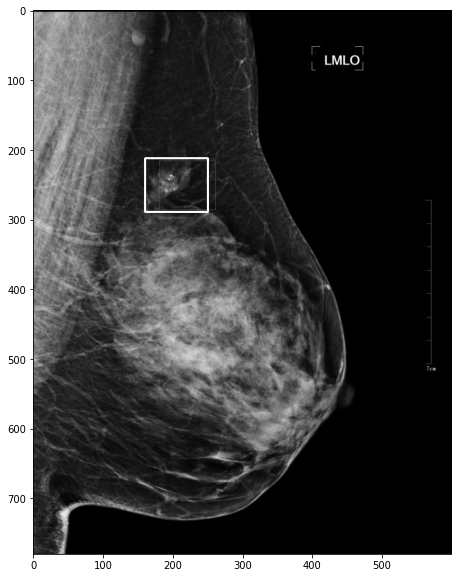

In [37]:
image = cv2.imread("mammogram.jpeg", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2)
plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

In [38]:
img_neg = -1 * image + 255

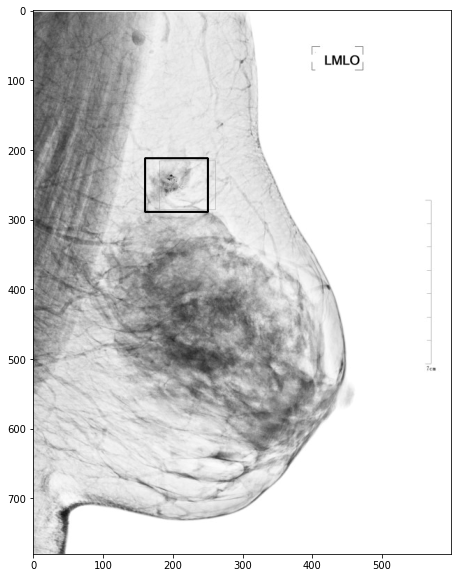

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap = "gray")
plt.show()

**Brightness And Contrast Adjustments**

In [40]:
alpha = 1 # Simple contrast control
beta = 100 # Simple brightness control
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

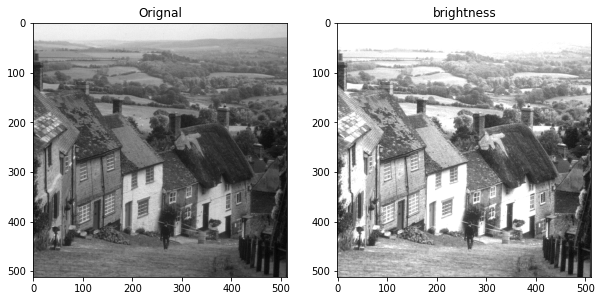

In [41]:
plot_image(goldhill, new_image, title_1 = "Orignal", title_2 = "brightness")

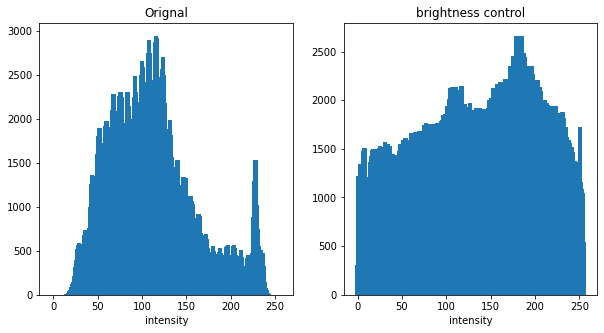

In [55]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness control")

In [43]:
plt.figure(figsize=(10,5))
alpha = 2# Simple contrast control
beta = 0 # Simple brightness control # Simple brightness control
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

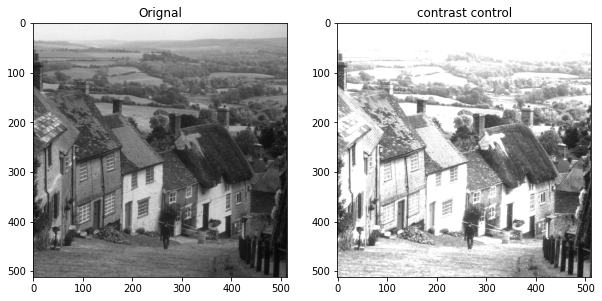

In [44]:
plot_image(goldhill,new_image,"Orignal","contrast control")

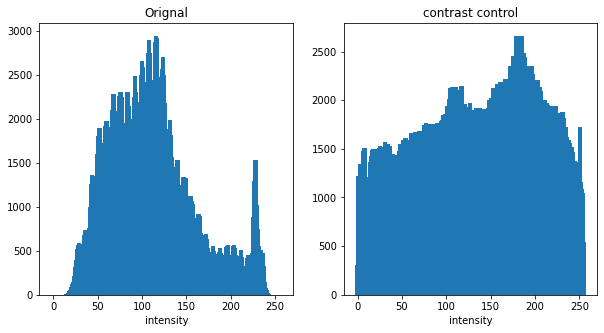

In [56]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image,"Orignal","contrast control")

In [46]:
plt.figure(figsize=(10,5))
alpha = 3 # Simple contrast control
beta = -200 # Simple brightness control
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

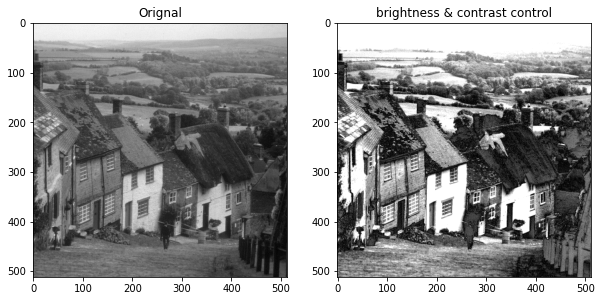

In [47]:
plot_image(goldhill, new_image, "Orignal", "brightness & contrast control")

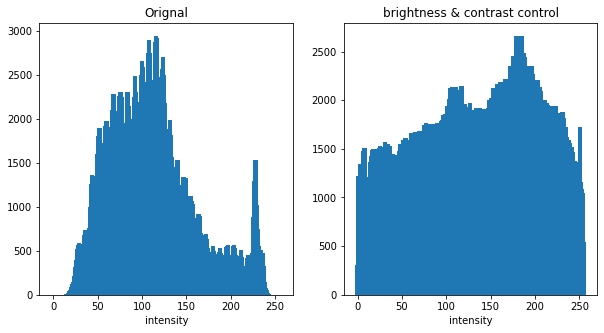

In [57]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness & contrast control")

**Histogram Equalization**

In [49]:
zelda = cv2.imread("zelda.jpeg",cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(zelda)

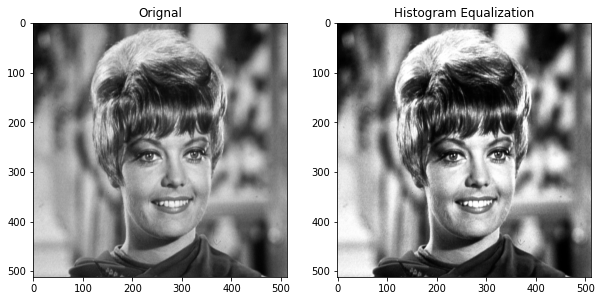

In [50]:
plot_image(zelda,new_image,"Orignal","Histogram Equalization")

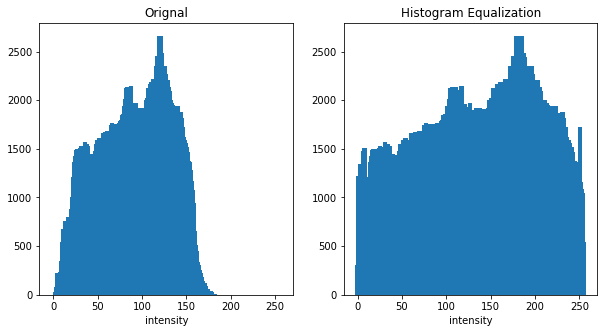

In [58]:
plt.figure(figsize=(10,5))
plot_hist(zelda, new_image,"Orignal","Histogram Equalization")

**Thresholding and Simple Segmentation**

In [53]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
 N,M=input_img.shape
 image_out=np.zeros((N,M),dtype=np.uint8)

 for i in range(N):
   for j in range(M):
     if input_img[i,j]> threshold:
       image_out[i,j]=max_value
     else:
       image_out[i,j]=min_value

 return image_out 

In [59]:
toy_image

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

In [60]:
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

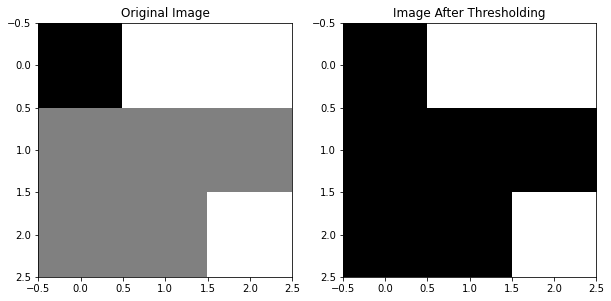

In [61]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

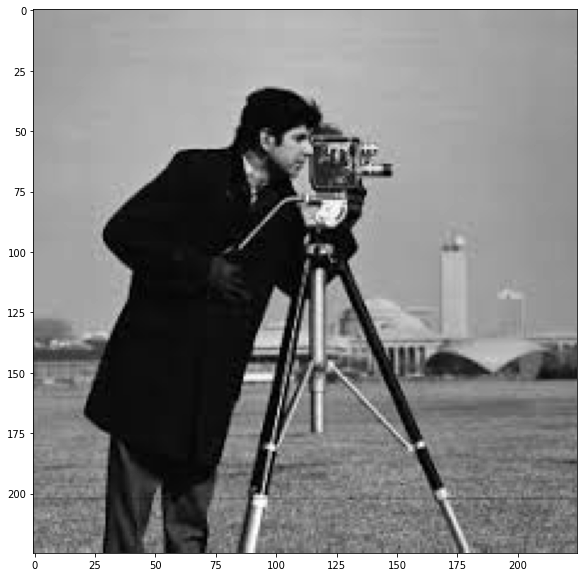

In [62]:
image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

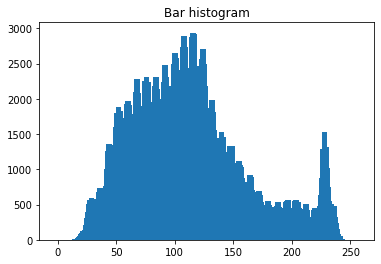

In [63]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

In [64]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

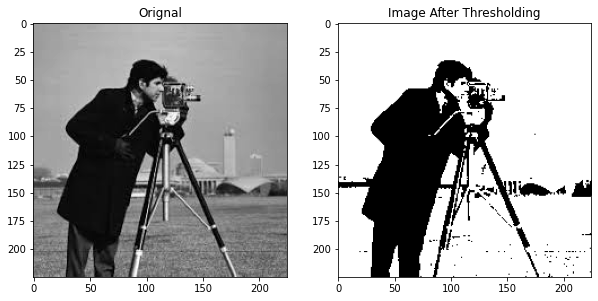

In [65]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

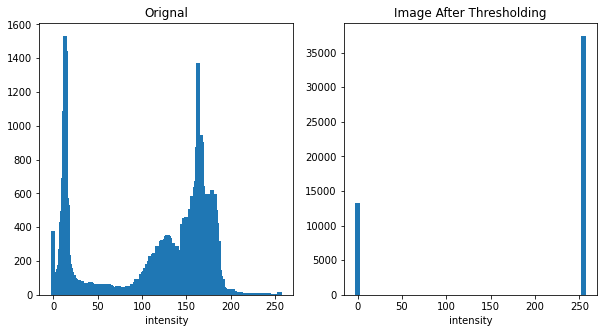

In [66]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

In [67]:
cv2.THRESH_BINARY

0

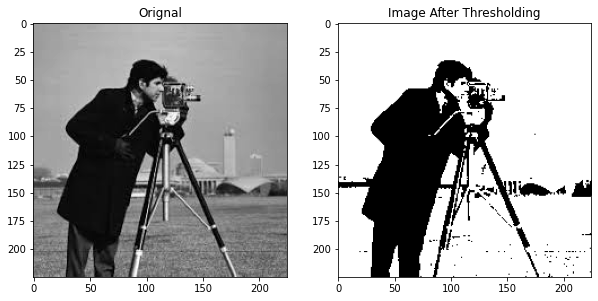

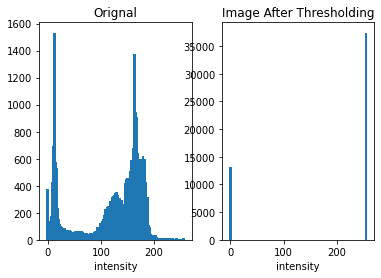

In [68]:
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

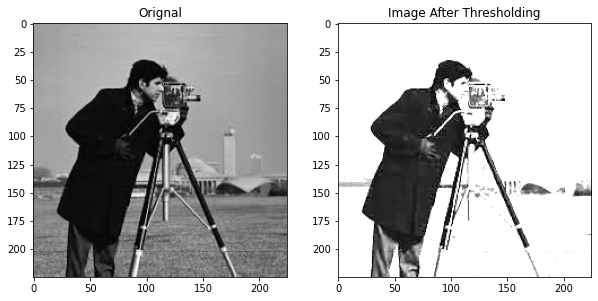

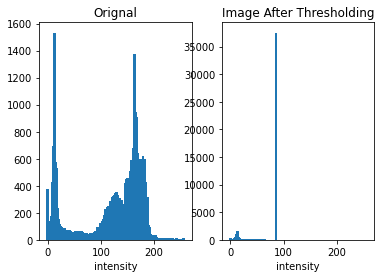

In [69]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

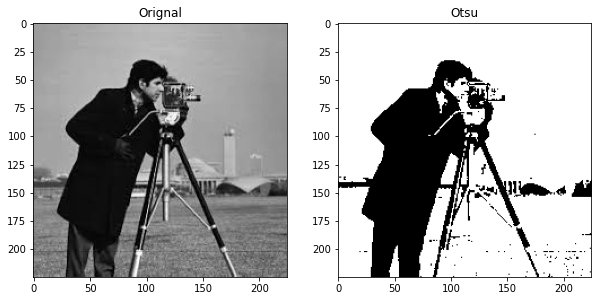

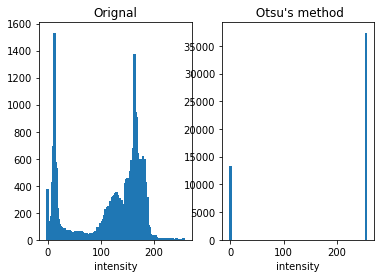

In [70]:
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")

In [71]:
ret

88.0